In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv('/Users/CarlosKAustin/Python Projects/education_inequality_data.csv')

In [4]:
df.head()

,id,school_name,state,school_type,grade_level,funding_per_student_usd,avg_test_score_percent,student_teacher_ratio,percent_low_income,percent_minority,internet_access_percent,dropout_rate_percent
0,1,Bowman High School,Michigan,Private,High,9575.80,65.9,17.5,30.0,44.0,74.1,3.44
1,2,Foster High School,Michigan,Charter,Middle,16733.10,87.3,24.2,93.5,40.1,79.9,8.67
2,3,Henson High School,New York,Public,Middle,24890.74,72.8,27.0,58.1,35.8,51.1,14.75
3,4,Weaver High School,Texas,Private,Elementary,6857.49,81.5,26.2,82.7,72.0,55.5,13.45
4,5,King Elementary School,Michigan,Public,Elementary,16910.73,44.7,20.2,41.4,16.1,57.8,6.98


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   school_name              1000 non-null   object 
 2   state                    1000 non-null   object 
 3   school_type              1000 non-null   object 
 4   grade_level              1000 non-null   object 
 5   funding_per_student_usd  1000 non-null   float64
 6   avg_test_score_percent   1000 non-null   float64
 7   student_teacher_ratio    1000 non-null   float64
 8   percent_low_income       1000 non-null   float64
 9   percent_minority         1000 non-null   float64
 10  internet_access_percent  1000 non-null   float64
 11  dropout_rate_percent     1000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 93.9+ KB


In [6]:
df.describe()

,id,funding_per_student_usd,avg_test_score_percent,student_teacher_ratio,percent_low_income,percent_minority,internet_access_percent,dropout_rate_percent
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,15154.160180,70.001000,19.733200,53.756400,49.652000,74.688500,7.765600
std,288.819436,5931.384208,17.703408,5.823201,24.021689,25.241025,14.433086,4.214452
min,1.000000,5012.970000,40.000000,10.000000,10.200000,5.000000,50.000000,0.500000
25%,250.750000,9726.040000,54.575000,14.800000,33.400000,29.300000,62.400000,4.050000
50%,500.500000,15362.465000,69.900000,19.400000,54.100000,49.450000,74.750000,7.685000
75%,750.250000,20280.007500,85.625000,25.000000,74.600000,69.950000,87.325000,11.492500
max,1000.000000,24981.900000,100.000000,30.000000,94.900000,94.900000,100.000000,14.990000


In [7]:
# Exploring Correlation and looking for relationships between data points
df_corr = df[['percent_low_income', 'student_teacher_ratio', 'dropout_rate_percent', 
    'avg_test_score_percent', 'internet_access_percent', 'percent_minority',
    'funding_per_student_usd']].corr()
df_corr

,percent_low_income,student_teacher_ratio,dropout_rate_percent,avg_test_score_percent,internet_access_percent,percent_minority,funding_per_student_usd
percent_low_income,1.000000,-0.071567,0.001965,-0.003309,0.005844,-0.024113,0.012404
student_teacher_ratio,-0.071567,1.000000,0.013636,0.040433,0.033274,-0.017478,-0.030342
dropout_rate_percent,0.001965,0.013636,1.000000,-0.018712,0.015013,-0.002207,-0.039932
avg_test_score_percent,-0.003309,0.040433,-0.018712,1.000000,-0.001994,-0.012847,0.020301
internet_access_percent,0.005844,0.033274,0.015013,-0.001994,1.000000,-0.000243,0.016274
percent_minority,-0.024113,-0.017478,-0.002207,-0.012847,-0.000243,1.000000,-0.012082
funding_per_student_usd,0.012404,-0.030342,-0.039932,0.020301,0.016274,-0.012082,1.000000


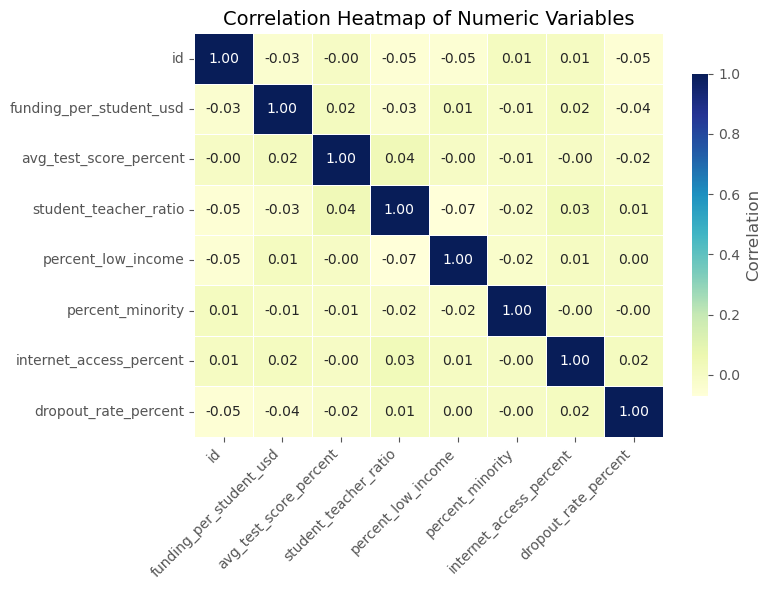

In [10]:
numeric_data = df.select_dtypes(include=[np.number])

if numeric_data.shape[1] >= 4:
    plt.figure(figsize=(8, 6))
    correlation_matrix = numeric_data.corr()
    
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap="YlGnBu",
        linewidths=0.5,
        cbar_kws={'shrink': 0.8, 'label': 'Correlation'}
    )

    plt.title("Correlation Heatmap of Numeric Variables", fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
# The heatmap and correlation matrix indicate low correlation between the numeric variables in this dataset. 
# Next step is to identify underserved states by creating multivariable scatter plots.

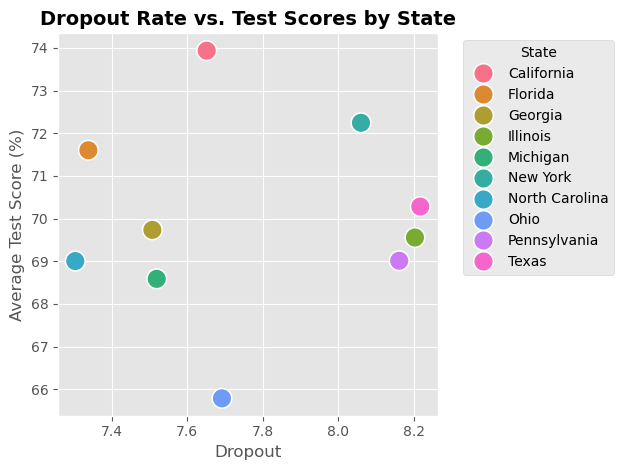

In [92]:
#Calculate average dropout rate and test scores per state

state_summary = df.groupby('state').agg({
    'dropout_rate_percent' : 'mean',
    'avg_test_score_percent' : 'mean',
    }).reset_index()

sns.scatterplot(
    data= state_summary,
    x = 'dropout_rate_percent',
    y= 'avg_test_score_percent',
    hue = 'state',
    color = 'YlGnBu',
    s = 200)

plt.title("Dropout Rate vs. Test Scores by State", fontsize=14, fontweight="bold")
plt.xlabel("Dropout")
plt.ylabel("Average Test Score (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="State")
plt.tight_layout()
plt.show()


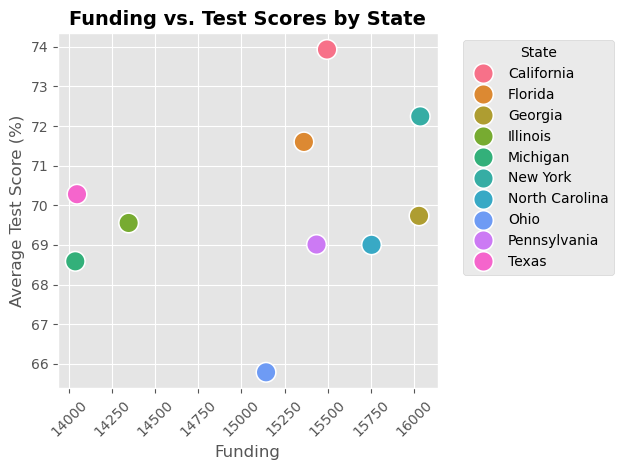

In [91]:
#Calculate average funding and test score per state
funding_summary = df.groupby('state').agg({
    'funding_per_student_usd' : 'mean',
    'avg_test_score_percent' : 'mean',
    }).reset_index()

sns.scatterplot(
    data= funding_summary,
    x = 'funding_per_student_usd',
    y= 'avg_test_score_percent',
    hue = 'state',
    color = 'YlGnBu',
    s = 200)

plt.title("Funding vs. Test Scores by State", fontsize=14, fontweight="bold")
plt.xlabel("Funding")
plt.ylabel("Average Test Score (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="State")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show() 

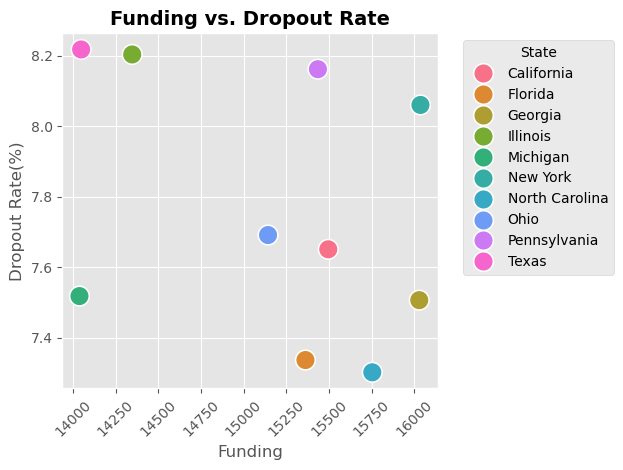

In [14]:
#Calculate average funding and dropout rate per state
funding_summary = df.groupby('state').agg({
    'funding_per_student_usd' : 'mean',
    'dropout_rate_percent' : 'mean',
    }).reset_index()
sns.scatterplot(
    data= funding_summary,
    x = 'funding_per_student_usd',
    y= 'dropout_rate_percent',
    hue = 'state',
    color = 'YlGnBu',
    s = 200)

plt.title("Funding vs. Dropout Rate", fontsize=14, fontweight="bold")
plt.xlabel("Funding")
plt.ylabel("Dropout Rate(%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="State")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()   

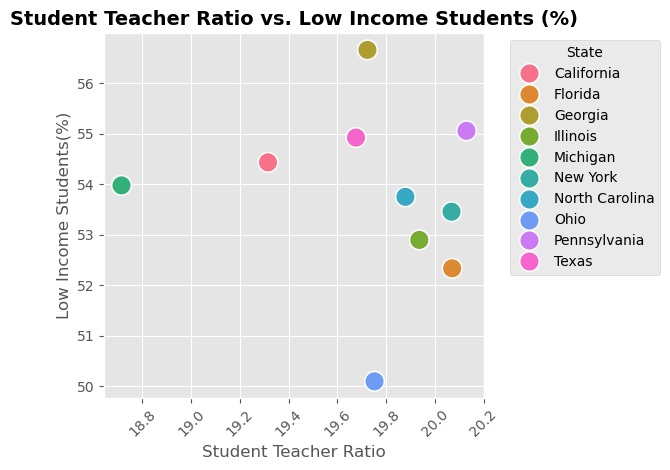

In [16]:
#Calculate average student teacher ratio and percent of low income students

funding_summary = df.groupby('state').agg({
    'student_teacher_ratio' : 'mean',
    'percent_low_income' : 'mean',
    }).reset_index()

sns.scatterplot(
    data= funding_summary,
    x = 'student_teacher_ratio',
    y= 'percent_low_income',
    hue = 'state',
    color = 'YlGnBu',
    s = 200)

plt.title("Student Teacher Ratio vs. Low Income Students (%)", fontsize=14, fontweight="bold")
plt.xlabel("Student Teacher Ratio")
plt.ylabel("Low Income Students(%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="State")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
#Scatter Plot Takeaways: 

# Michigan stands out with the second-lowest average test scores while also having the second-lowest in funding per student.

# Texas and Illinois show the highest dropout rates, and both fall into the bottom half of states in terms of funding per student.

# In terms of class size, all states except Michigan report more than 19 students per teacher, highlighting relatively high student–teacher ratios.

# Georgia has the highest percentage of low-income students, with more than 56% of its student population classified as low-income.


In [ ]:
#Next Step Ideas: Pick a state and do a deep dive on their characteristics. What are strong points and weaknesses. Break it down by school type and grade level 
